# VizieR: 2MASS

In [2]:
# generic imports for making a synth ccd image
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('dark_background')
import numpy as np
import scipy as sp
plt.rcParams['image.origin'] = 'lower' 
from astroquery.simbad import Simbad
from astroquery.vizier import Vizier
from astropy.coordinates import SkyCoord
import astropy.coordinates as coord
import astropy.units as u

gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!


In [3]:
Vizier = Vizier(timeout=3000)

In [18]:
Vizier.ROW_LIMIT = 3e5
rslt = Vizier.query_constraints(catalog="II/246", GLAT='<2 & >-2', Kmag='<7', GLON='<10 | >350')[0]
crds = coord.SkyCoord(rslt['RAJ2000'], rslt['DEJ2000'], frame='fk5', unit=(u.deg, u.deg)).galactic

Text(0.5, 1.0, 'Number of sources with K<7 per 20x20 arcminute region')

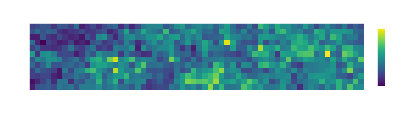

In [20]:
gridy,gridx = np.mgrid[-2:2:0.333, -10:10:0.333]
his,xe,ye = np.histogram2d(crds.galactic.l.wrap_at(180*u.deg).deg, crds.galactic.b.deg, bins=[gridx[0,:], gridy[:,0]])

fig = plt.figure(1)
fig.clf()
ax = fig.gca()
plt.imshow(his.T, extent=[xe.min(),xe.max(),ye.min(),ye.max()])
ax.set_aspect('equal') #gridx.shape[1]/gridx.shape[0])
cax = fig.add_axes([0.93, 0.4, 0.02, 0.2])
plt.colorbar(cax=cax)

ax.set_xlabel("Galactic Longitude")
ax.set_xlabel("Galactic Latitude")
ax.set_title("Number of sources with K<7 per 20x20 arcminute region")

In [6]:
v = Vizier(columns=['_RAJ2000', '_DEJ2000','*'], column_filters={"Kmag":"<7"})

In [7]:
reg_2mass = v.query_region(coord.SkyCoord(ra=261.931236, dec=-36.346729,
                                             unit=(u.deg, u.deg),
                                             frame='icrs'),
                         width="0d25m0s",
                         catalog="II/246")[0]
crds_2mass = coord.SkyCoord(reg_2mass['RAJ2000'], reg_2mass['DEJ2000'], frame='fk5', unit=(u.deg, u.deg)).galactic

Text(0.5, 1.0, 'Number of sources with K<7 per 25x25 arcminute region')

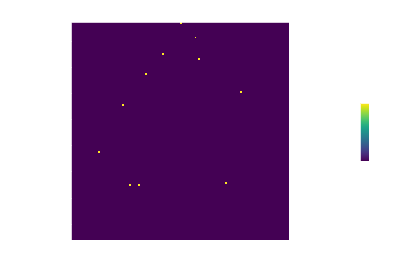

In [21]:
gridy,gridx = np.mgrid[-1.031:-.6143:0.003472222, -8.5235:-8.1068:0.003472222]
his,xe,ye = np.histogram2d(crds_2mass.galactic.l.wrap_at(180*u.deg).deg, crds_2mass.galactic.b.deg, bins=[gridx[0,:], gridy[:,0]])

fig = plt.figure(1)
fig.clf()
ax = fig.gca()
plt.imshow(his.T, extent=[xe.min(),xe.max(),ye.min(),ye.max()])
ax.set_aspect('equal') #gridx.shape[1]/gridx.shape[0])
cax = fig.add_axes([0.93, 0.4, 0.02, 0.2])
plt.colorbar(cax=cax)

ax.set_xlabel("Galactic Longitude")
ax.set_xlabel("Galactic Latitude")
ax.set_title("Number of sources with K<7 per 25x25 arcminute region")

In [38]:
all_2mass = Vizier.query_region(SkyCoord(2.5*u.deg, 0.1*u.deg, frame='galactic'), 
                           radius=12.5*u.arcmin, catalog="II/246")[0]
crds_3mass = coord.SkyCoord(all_2mass['RAJ2000'], all_2mass['DEJ2000'], frame='fk5', unit=(u.deg, u.deg)).galactic

Text(0.5, 1.0, 'Density by pixel')

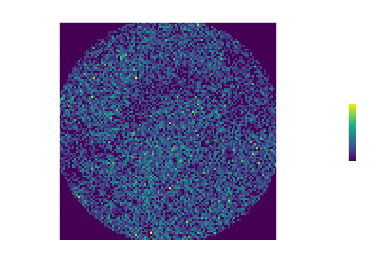

In [39]:
gridy,gridx = np.mgrid[-0.1:0.3:0.003472222, 2.3:2.7:0.003472222]
his,xe,ye = np.histogram2d(crds_3mass.galactic.l.wrap_at(180*u.deg).deg, crds_3mass.galactic.b.deg, bins=[gridx[0,:], gridy[:,0]])

fig = plt.figure(1)
fig.clf()
ax = fig.gca()
plt.imshow(his.T, extent=[xe.min(),xe.max(),ye.min(),ye.max()])
ax.set_aspect('equal') #gridx.shape[1]/gridx.shape[0])
cax = fig.add_axes([0.93, 0.4, 0.02, 0.2])
plt.colorbar(cax=cax)

ax.set_xlabel("Galactic Longitude")
ax.set_ylabel("Galactic Latitude")
ax.set_title("Density by pixel")

# VizieR: VVV

In [9]:
rslt_vvv = Vizier.query_constraints(catalog=["II/337", "II/348"], GLAT='<2 & >-2', Kmag='<7', GLON='<10 | >350')[0]
crds_vvv = coord.SkyCoord(rslt_vvv['RAJ2000'], rslt_vvv['DEJ2000'], frame='fk5', unit=(u.deg, u.deg)).galactic

Text(0.5, 1.0, 'Number of sources with K<7 per 20x20 arcminute region')

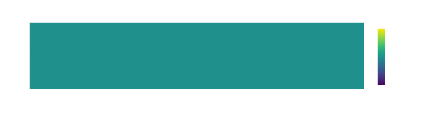

In [11]:
gridy,gridx = np.mgrid[-2:2:0.33, -10:10:0.333]
his,xe,ye = np.histogram2d(crds_vvv.galactic.l.wrap_at(180*u.deg).deg, crds_vvv.galactic.b.deg, bins=[gridx[0,:], gridy[:,0]])

fig = plt.figure(1)
fig.clf()
ax = fig.gca()
plt.imshow(his.T, extent=[xe.min(),xe.max(),ye.min(),ye.max()])
ax.set_aspect('equal') #gridx.shape[1]/gridx.shape[0])
cax = fig.add_axes([0.93, 0.4, 0.02, 0.2])
plt.colorbar(cax=cax)

ax.set_xlabel("Galactic Longitude")
ax.set_xlabel("Galactic Latitude")
ax.set_title("Number of sources with K<7 per 20x20 arcminute region")

In [12]:
vvv = Vizier(columns=['_RAJ2000', '_DEJ2000','*'], column_filters={"Ksmag3":"<7"})

In [31]:
test = Vizier.query_region(SkyCoord(2.5*u.deg, 0.1*u.deg, frame='galactic'), 
                           radius=12.5*u.arcmin, catalog=["II/337", "II/348"])[1]
testc = coord.SkyCoord(test['RAJ2000'], test['DEJ2000'], frame='fk5', unit=(u.deg, u.deg)).galactic

Text(0, 0.5, 'Galactic Latitude')

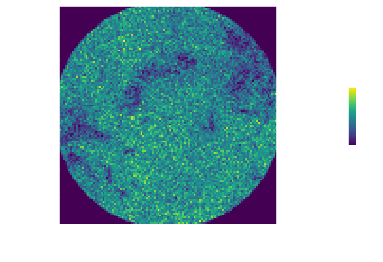

In [32]:
gridy,gridx = np.mgrid[-0.1:0.3:0.003472222, 2.3:2.7:0.003472222]
his,xe,ye = np.histogram2d(testc.galactic.l.wrap_at(180*u.deg).deg, testc.galactic.b.deg, bins=[gridx[0,:], gridy[:,0]])

fig = plt.figure(1)
fig.clf()
ax = fig.gca()
plt.imshow(his.T, extent=[xe.min(),xe.max(),ye.min(),ye.max()])
ax.set_aspect('equal') #gridx.shape[1]/gridx.shape[0])
cax = fig.add_axes([0.93, 0.4, 0.02, 0.2])
plt.colorbar(cax=cax)

ax.set_xlabel("Galactic Longitude")
ax.set_ylabel("Galactic Latitude")

In [43]:
testc[0]

<SkyCoord (Galactic): (l, b) in deg
    (2.30207218, 0.03580034)>

In [34]:
test1 = Vizier.query_region(SkyCoord(2.5*u.deg, 0.1*u.deg, frame='galactic'), 
                           radius=12.5*u.arcmin, catalog=["II/337", "II/348"])

In [46]:
test1[1][0]["Ksmag3"]

14.272

# Imaging the Stars

In [55]:
from astropy.table import Table
table = Table()
flux = []
#1 pixel = 25" = 0.0002083333 deg
x_pos = []
y_pos = []
total_rows = len(test["Ksmag3"])
for ii in range(total_rows):
    # need to convert mags to flux
    mag = test[ii]["Ksmag3"]
    convert = 10**(-mag/2.5)
    flux.append(convert)
table['flux'] = amp
#table['x_0'] = x_pos
#table['y_0'] = y_pos